In [2]:
# import some libraries we'll need
import numpy as np
from matplotlib import pyplot as plt
import torch
import matplotlib.pylab as pylab

In [3]:
### Set parameters for plotting purposes #####
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

For the following function with 1 input and 1 output:
$f(x) = x^2 +\sin(x)$
* Write a formula for $\frac{df}{dx}$ in a markdown cell
* Plot $f(x)$ and $\frac{df}{dx}$ as functions of $x$, evaluated in increments of 0.01 from $x=-5$ to $x=5$
* Verify that your formula is correct by comparing the calculated derivative to the finite difference approximation $\frac{df}{dx} = \frac{f(x + h) - f(x)}{h}$, using a small value of $h$ (try 1e-6 or 1e-7). Plot this approximate derivative for the same values of $x$

$\frac{df}{dx} = \frac{(x+h)^2 +\sin(x+h)-(x^2+\sin(x))}{h}$, Analytical : $\frac{df}{dx}=2x+\cos(x)$

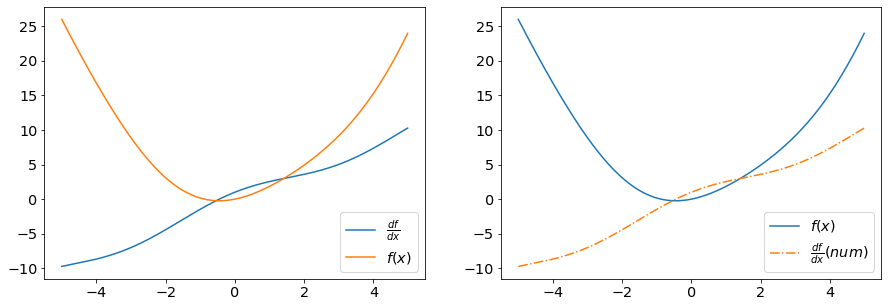

In [4]:
x=np.arange(-5,5,0.01)
h=1.0e-6
def f(xdata):
    return xdata**2 +np.sin(xdata)
def dfdx(xdata):
    return 2*xdata+np.cos(xdata)
def dfdxnum(xdata,h):
    return ((xdata+h)**2 +np.sin(x+h)-(x**2+np.sin(x)))/h
fx=f(x)
deriv=dfdx(x)
derivnum=dfdxnum(x,h)

fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.ravel()
ax[0].plot(x,deriv,label=r"$\frac{df}{dx}$")
ax[0].plot(x,fx,label=r"$f(x)$")
ax[1].plot(x,fx,label=r"$f(x)$")
ax[1].plot(x,derivnum,label=r"$\frac{df}{dx}(num)$",linestyle='-.')
ax[0].legend()
ax[1].legend()
    

Now let's use $f(x) = x_1^2 - x_1x_2$, with 2 inputs and 1 output
* Again find a formula for the row vector $\frac{df}{dx}$
* Randomly generate some 2D points with $0 < x_1, x_2 < 1$. For each point, calculate $\frac{df}{dx}$, and compare to finite difference approximations of $\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}$.

$\frac{df}{dx}=(2x_{1}-x_{2},-x_{1})$

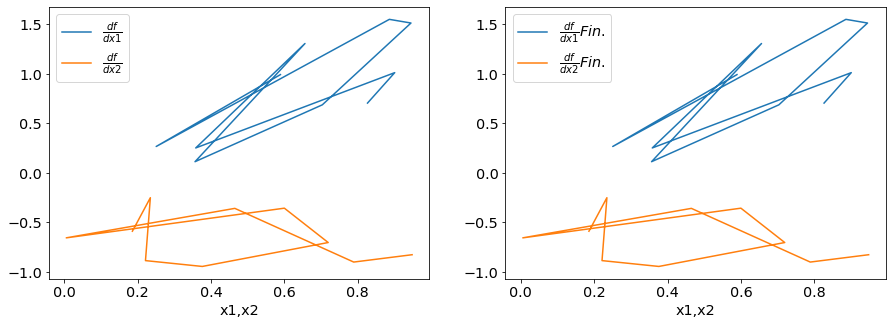

In [5]:
x1x2=np.random.rand(10,2)
def dfdxmulti(x1,x2):
    return np.array([2*x1-x2,-x1])

dfdx=dfdxmulti(x1x2[:,0],x1x2[:,1])
dfdx1=dfdx[0]
dfdx2=dfdx[1]

def dfdx1fin(x1,x2):
    return ((x1+h)**2-(x1+h)*x2-((x1)**2-(x1)*x2))/h
def dfdx2fin(x1,x2):
    return ((x1)**2-(x1)*(x2+h)-((x1)**2-(x1)*x2))/h

dfdx1num=dfdx1fin(x1x2[:,0],x1x2[:,1])
dfdx2num=dfdx2fin(x1x2[:,0],x1x2[:,1])

fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.ravel()
ax[0].plot(x1x2[:,0],dfdx1,label=r"$\frac{df}{dx1}$")
ax[1].plot(x1x2[:,0],dfdx1num,label=r"$\frac{df}{dx1}Fin.$")
ax[0].set_xlabel("x1,x2")
ax[1].plot(x1x2[:,1],dfdx2,label=r"$\frac{df}{dx2} Fin.$")
ax[0].plot(x1x2[:,1],dfdx2num,label=r"$\frac{df}{dx2}$")
ax[1].set_xlabel("x1,x2")
ax[0].legend()
ax[1].legend()




For $x \in \mathbb R^2$, let's define

$$
y = f(x) = \left[\begin{array}{c} x_1^2 \\ 2x_2 - 0.1x_1\end{array}\right]
\\
z = g(y) = \left[\begin{array}{c}\frac{y_1}{y_2} \\ \sqrt{y_1^2 + y_2^2 }\end{array}\right]
$$

* For $x = \left[\begin{array}{c}1 \\ 1\end{array}\right]$, calculate $y, z$
* Calculate the $2\times 2$ matrices $\frac{df(x)}{dx}$ and $\frac{dg(y)}{dy}$ for this choice of $x$.
* Write out $z=g(f(x))$ as a function of $x$, eliminating $y$. Calculate $\frac{dz}{dx}$ as a formula, then evaluate that formula for $x = \left[\begin{array}{c}1 \\ 1\end{array}\right]$.
* For $x = \left[\begin{array}{c}1 \\ 1\end{array}\right]$, use the chain rule to compute $\frac{dz}{dx}$ as a product of two $2\times 2$ matrices, and compare the result to direct calculation without the chain rule.

In [6]:
x1x2=np.array([1,1])
def multiy(xdata):
    y=np.array([xdata[0]**2,2*xdata[1]-0.1*xdata[0]])
    return y
def multiz(y):
    z=np.array([y[0]/y[1],np.sqrt(y[0]**2+y[1]**2)])
    return z
def dfdxmulti2(xdata):
    dfdxar=np.zeros((2,2))
    dfdxar[0][0]=2*xdata[0]
    dfdxar[0][1]=0
    dfdxar[1][0]=-0.1
    dfdxar[1][1]=2
    return dfdxar
def dgdymulti2(y):
    dgdyar=np.zeros((2,2))
    dgdyar[0][0]=1/y[1]
    dgdyar[0][1]= np.log(y[1])*y[0]
    dgdyar[1][0]=(y[0])/np.sqrt(y[0]**2+y[1]**2) 
    dgdyar[1][1]=(y[1])/np.sqrt(y[0]**2+y[1]**2)
    return dgdyar
youtput=multiy(x1x2)
zoutput=multiz(youtput)
dfdxprob2=dfdxmulti2(x1x2)
dgdy=dgdymulti2(youtput)

print('y=',youtput)
print('z=',zoutput)
print('dfdx=',dfdxprob2)
print('dgdy=',dgdy)

    
    
    

y= [1.  1.9]
z= [0.52631579 2.14709106]
dfdx= [[ 2.   0. ]
 [-0.1  2. ]]
dgdy= [[0.52631579 0.64185389]
 [0.46574643 0.88491822]]


In [7]:
def dzdxanaly(xdata):
    dzdxanalar=np.zeros((2,2))
    diff=2*xdata[1]-0.1*xdata[0]
    sqr=np.sqrt(diff)
    sqrquad=np.sqrt(xdata[0]**4+(diff)**2)
    dzdxanalar[0][0]=(sqr*2*xdata[0]+(0.1*x[0]**2)/(2*sqr))
    dzdxanalar[0][1]=-2*xdata[0]**2/(2*xdata[1]**2-0.1*xdata[0])**2
    dzdxanalar[1][0]=-(diff*0.1+4*xdata[0]**3)/sqrquad
    dzdxanalar[0][1]=2*(diff)/sqrquad
    return dzdxanalar
dzdxanal=dzdxanaly(x1x2)
dzdxnumer=dfdxprob2@dgdy
    

In [8]:
print(dzdxanal)
print(dzdxnumer)

[[ 3.66365506  1.76983644]
 [-1.95147755  0.        ]]
[[1.05263158 1.28370777]
 [0.87886129 1.70565106]]


Suppose we have a neural network with two inputs, two hidden layers of 8 units each, ReLU activations (except for $\hat y = f_\text{out}(h_L)$) and one output.

* Write an algorithm using python to compute the NN output $\hat y$ given the input and the free parameters (weights and biases)
* Write an algorithm to compute derivatives of the least squares loss $(y - \hat y)^2$ with respect to all free parameters of the NN. This should be a python function that takes the free parameters, NN inputs $x$ and NN training targets $y$ as its own inputs.
* **Difficult problem, skip for now if you get stuck**: Extend your derivative computation algorithm to work with any number of hidden layers, all of which can have different numbers of hidden units.

In [9]:
def maximum(affine):
    return np.maximum(0,affine)
xinput=np.full((2,1),1)
W1=np.full((8,1),1)
W2=np.full((1,8),0.5)
Wlast=0.4
b1=np.full((8,1),0.5)
b2=0.75
blast=0.9
weights_list=[W1,W2,Wlast]
biases_list=[b1,b2,blast]
#h1=maximum(W1,xinput,b1)
def algorithm(weights,biases,xinputs,hidnumb):
    #print(xinputs)
    #print(biases[0])
    #print(weights[0])
    h=[]
    h.append(maximum(weights[0]@xinputs+biases[0]))
    for i in range(1,hidnumb):
        h.append(maximum(weights[i]@h[i-1]+biases[i]))
    Wout=weights[:-1]
    print(Wout)
    print(h[:-1])
    yhat=Wout@h[:-1]+biases[:-1]
    return yhat
        

In [10]:
xinput=np.full((1,2),1)
W1=np.full((8,1),1)
W2=np.full((8,1),0.5)
Wlast=np.full((1,2),0.4)
b1=np.full((8,2),0.3)
b2=np.full((1,2),0.75)
blast=0.9
weights_list=[W1,W2,Wlast]
biases_list=[b1,b2,blast]
h1=maximum(weights_list[0]@xinput+biases_list[0])
print(np.shape(h1))
h2=maximum(weights_list[1].T@h1+biases_list[1])
print(np.shape(h2))
yout=maximum(weights_list[2]@h2.T+biases_list[2])
print(yout)


(8, 2)
(1, 2)
[[5.66]]


In [11]:
'''x_t = torch.tensor(x)  # convert from numpy to pytorch
x_t.requires_grad = True  # tell PyTorch we want to take derivatives of something with respect to this variable

y_t = f(x_t)  # calculate the function. this is the "forward step"
s = torch.sum(y_t)  # add up f(x) for all x
s.backward()  #'''

'x_t = torch.tensor(x)  # convert from numpy to pytorch\nx_t.requires_grad = True  # tell PyTorch we want to take derivatives of something with respect to this variable\n\ny_t = f(x_t)  # calculate the function. this is the "forward step"\ns = torch.sum(y_t)  # add up f(x) for all x\ns.backward()  #'

In [12]:
#yHAT=algorithm(weights_list,biases_list,xinput,2)

We'll now download a data file and extract 3 variables. Each is a NumPy array:
* 'y' contains monthly values of the [Nino 3.4 ENSO index](https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni), describing the [El Nino Southern Oscillation](https://en.wikipedia.org/wiki/El_Ni%C3%B1o%E2%80%93Southern_Oscillation) over time.
* `x` contains empirical orthogonal function coefficients that describe the ocean temperature at the sea surface and the depth average over the top 300 meters, in the Indo-Pacific, North-Pacific and Atlantic regions. Essentially, the numbers in each row of $x$ summarize temperatures in the upper ocean across the globe. For details of how these are calculated, you can consult [this paper](https://www.nature.com/articles/s41586-019-1559-7) by Ham et al. Each row of `x` describes the ocean state 2 months before the corresponding element of `y`.
* `t` contains the time in months since Jan. 1 1970 for each value of `y`. We can use this for plotting results but it won't appear in our calculations otherwise.

In [13]:
# library for downloading files from google drive.
!pip install gdown  

# download the data
!gdown https://drive.google.com/uc?id=1FUb-2lcAd0Y1ULjx5jB6UTMNDmGy3vZA

zsh:1: no matches found: https://drive.google.com/uc?id=1FUb-2lcAd0Y1ULjx5jB6UTMNDmGy3vZA


In [14]:
# load the data
with np.load('enso_and_pca.npz') as data:
    t, x, y = data['t'], data['x'], data['y']

In [15]:
np.shape(x)

(1233, 46)

Normalize `y` and each column of `x` so they all have a mean of zero and a standard deviation of one. Keep track of what you've done, so you can convert your predictions back into original data units later on if needed.

In [16]:
meany= np.mean(y)

stdy= np.std(y)

meanx= np.mean(x,axis=0)

stdx= np.std(x,axis=0)

normy= (y-meany) / stdy

normx= (x-meanx) / stdx

print(np.mean(normx))

print(np.var(normx))

4.304465e-09
0.99999994


Last time we wrote a loop by hand to cycle over the data. However, pytorch provides great utilities to do this for us, which will let us focus on what's new in each lesson instead. In particular, we're going to use the PyTorch Dataset and DataLoader classes.

In [17]:
from torch.utils.data import TensorDataset, DataLoader

# create PyTorch tensors for our inputs and target outputs
xt = torch.tensor(normx)
yt = torch.tensor(normy)

# use the first 1100 time points as training data
xt_train, yt_train = xt[:1100], yt[:1100]

# save the remaining data for testing
xt_test, yt_test = xt[1100:], yt[1100:]

dataset = TensorDataset(xt_train, yt_train)  # combine the inputs and outputs into a PyTorch Dataset object
# create a dataloader to serve up batches of 8 data point for training
data_loader = DataLoader(dataset, batch_size=8, shuffle=True)

Now let's get the first 'batch' of data from the dataloader, and see what it looks like.

In [18]:
for x_batch, y_batch in data_loader:
    print('shape of x_batch: {0}'.format(x_batch.shape) )
    print('shape of y_batch: {0}'.format(y_batch.shape) )  
    break  # if we didn't have this line, the for loop would cycle through all the data

shape of x_batch: torch.Size([8, 46])
shape of y_batch: torch.Size([8])


Now use a for loop, iterating over batches from the data loader, to fit a linear regression $\hat y = x\cdot \beta$ with least squares loss, by stochastic gradient descent. Refer back to the code you wrote from the last set of exercises for guidance (and feel free to copy-paste from your own previous homework).
* Add an extra column of ones to `x` to incorporate a constant term
* Don't forget to set `requires_grad = True` when initializing `beta`
* Choose how to initialize $\beta$. All zeros? Random? Does it make much of a difference here?
* As before, don't forget to use `with torch.no_grad():` when updating parameters
* Store the loss at each iteration of the loop.
* Does the loss decrease on the training data? Do you get a positive correlation between $y$ and $\hat y$ at the end on the training data?
* See if you can get a better result by adjusting the initialization of free parameters or the learning rate

In [54]:
##### Stochastic Gradient Descent for y=beta*x#########
LR=1.0e-13
beta = torch.full((1,46),0.0, requires_grad=True)
epochs=100
loss_list_bx=[]
beta_list_bx=[]
for k in range(epochs):
    for j,(x_batch, y_batch) in enumerate(data_loader):
        yhat = torch.matmul(beta,x_batch.T)
        #print(yhat)
        #yhat_sum=torch.sum(yhat)
        loss = torch.sum((yhat-y_batch)**2)
        #print(loss.size)
        #print(loss)
        loss.backward()
    with torch.no_grad():
        beta -= beta.grad * LR
        beta_list_bx.append(beta)
        #print(beta)
        beta.grad.zero_()
    loss_list_bx.append(loss)
print(beta)
    

tensor([[ 2.6079e-09,  1.2493e-08,  1.3326e-08,  5.4428e-09,  4.3874e-11,
          7.5137e-10,  2.3366e-09,  2.0227e-10, -1.0707e-09,  1.5707e-09,
         -6.5215e-09,  4.5527e-09, -1.2337e-08, -2.0606e-09, -2.9054e-09,
         -5.7119e-09, -7.9940e-10,  5.4148e-10,  4.1639e-09,  6.7158e-09,
         -8.8848e-10, -3.9345e-09, -1.6900e-09,  1.2051e-08,  6.4113e-09,
         -4.5397e-09,  9.7528e-09,  1.0566e-09, -4.7275e-09, -1.0615e-09,
         -1.9268e-09, -2.3241e-09,  4.5730e-09,  1.0829e-08,  2.8628e-09,
          5.7747e-09, -1.2743e-10, -3.3283e-09, -4.8326e-09,  6.1121e-10,
          2.5358e-09,  4.9942e-09,  4.9149e-09,  8.6871e-10,  2.4539e-10,
         -3.5140e-10]], requires_grad=True)


In [20]:
'''loss_list_bx_np=[]
iter_plot=np.arange(0,100,1)
for i in range(len(loss_list_bx)):
   loss_list_bx_np.append(loss_list_bx[i].detach().numpy())
plt.plot(iter_plot,loss_list_bx_np)'''

'loss_list_bx_np=[]\niter_plot=np.arange(0,100,1)\nfor i in range(len(loss_list_bx)):\n   loss_list_bx_np.append(loss_list_bx[i].detach().numpy())\nplt.plot(iter_plot,loss_list_bx_np)'

In [21]:
ones=np.full((1233,1),1,dtype=np.float32)
normx1=np.append(normx,ones,axis=1)

xt1= torch.tensor(normx1)
yt1 = torch.tensor(normy)

# use the first 1100 time points as training data
xt_train1, yt_train1 = xt1[:1100], yt1[:1100]

# save the remaining data for testing
xt_test1, yt_test1 = xt1[1100:], yt1[1100:]

dataset1 = TensorDataset(xt_train1, yt_train)  # combine the inputs and outputs into a PyTorch Dataset object
# create a dataloader to serve up batches of 8 data point for training
data_loader1 = DataLoader(dataset1, batch_size=8, shuffle=True)

In [22]:
for x_batch, y_batch in data_loader:
    print('shape of x_batch: {0}'.format(x_batch.shape) )
    print('shape of y_batch: {0}'.format(y_batch.shape) )  
    break  

shape of x_batch: torch.Size([8, 46])
shape of y_batch: torch.Size([8])


In [72]:
###### Stochastic Gradient Descent for y=beta*x+b, add column of ones to x ###########
LRaff=1.0e-7
beta1 = torch.zeros((1,47),requires_grad=True)
epochsaff=700
beta_aff_list=[]
loss_list_aff=[]
#def affine(epochs,data_load,betas):
for k in range(epochsaff):
    for j,(x_batch, y_batch) in enumerate(data_loader1):
        yhat = torch.matmul(beta1,x_batch.T)
        #print(yhat.size())
        loss = torch.sum((yhat-y_batch)**2)
        #print(loss)
        loss.backward()
        with torch.no_grad():
            beta1 -= beta1.grad * LRaff
            beta_aff_list.append(beta1)
            #print(beta)
            beta.grad.zero_()
    loss_list_aff.append(loss)
#print(beta_aff_list[-1])

In [73]:
predaffine_test=beta_aff_list[-1]@xt_test1.T
predaffine_train=beta_aff_list[-1]@xt_train1.T
predaffine_test.size()

torch.Size([1, 133])

Text(0, 0.5, 'Loss')

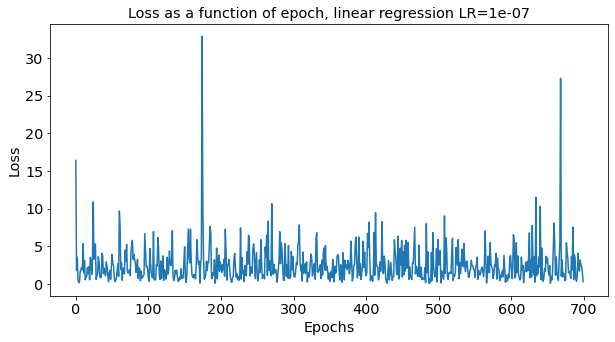

In [74]:
loss_list_aff_np=[]
iter_plot_aff=np.arange(0,epochsaff,1)
for i in range(len(loss_list_aff)):
   loss_list_aff_np.append(loss_list_aff[i].detach().numpy())
plt.plot(iter_plot_aff,loss_list_aff_np)
plt.title('Loss as a function of epoch, linear regression LR='+str(LRaff))
plt.xlabel('Epochs')
plt.ylabel('Loss')

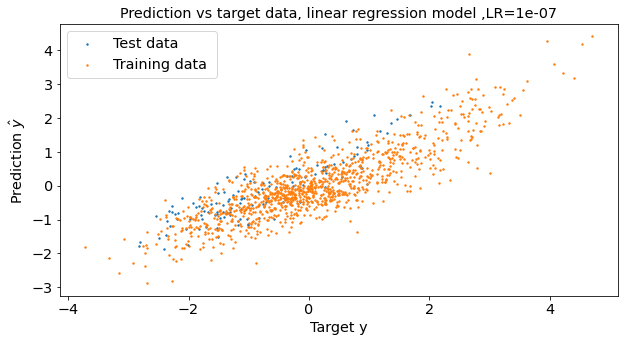

In [75]:
predaffine_test_np=predaffine_test.detach().numpy()
predaffine_train_np=predaffine_train.detach().numpy()
yt_test1_np=yt_test1.detach().numpy()
yt_train1_np=yt_train1.detach().numpy()


#print(xt_test1_np.shape, yt_test1_np.shape)
plt.scatter(predaffine_test_np,yt_test1_np,label='Test data',s=2)
plt.scatter(predaffine_train_np,yt_train1_np,label='Training data ',s=2)
plt.xlabel('Target y')
plt.ylabel("Prediction $\hat{y}$")
plt.title("Prediction vs target data, linear regression model ,LR="+str(LRaff))
plt.legend()

It seems that the fit on the target and test data is much better when beta is all zero as opposed to randomly initialized values.
The loss is low but does not clearly decrease with epochs. I observe a positive correlation between the target data and the prediction.

Now repeat the process, but instead of a linear model we'll use a neural network with two hidden layers of 32 units each, and the ReLU activation function $\phi(z) = \max(0, z)$. Again we'll use least squares loss and a batch size of 8.

**Don't** use PyTorch's built-in classes for this just yet. Instead:
* Define tensors of the correct size and data type (check `x.dtype`) for each variable containing free parameters (weights and biases) of your neural network. Remember to set `requires_grad = True` where needed.
* For each batch of data, compute the hidden state activations $h_1$ as a function of $W_1, b_1, x$
* Then compute $h_2$, $\hat y$ and $e=\ell(y, \hat y)$.
* Call `e.backward()` to compute derivatives of $e$ with respect to the free variables of your neural network, using backward-mode differentiation.
* Now update all free parameters based on the computed derivatives and the learning rate, just as you did for the linear regression example. Remember to use `with torch.no_grad():`
* Plot the convergence of the loss function over iterations. Are you getting a better fit than with the linear regression?
* How did you initialize? Does it make a difference now?

neural network with two hidden layers of 32 units each, and the ReLU activation function $\phi(z) = \max(0, z)$. Again we'll use least squares loss and a batch size of 8.

first step
xdata=(8,46)
W1=(32,8)
b1=(32,1)
h1=(32,46)
W2=(32,32)
b2=(8,32)
h2=(8,32)
Wout=(32,1)
bout=(1,1)

In [27]:
xt.size()

torch.Size([1233, 46])

In [28]:
for x_batch, y_batch in data_loader:
    print('shape of x_batch: {0}'.format(x_batch.shape) )
    print('shape of y_batch: {0}'.format(y_batch.shape) )  
    break

shape of x_batch: torch.Size([8, 46])
shape of y_batch: torch.Size([8])


In [29]:
def maximumtens(affine):
    return torch.maximum(torch.zeros(1),affine)

In [30]:
(x_batch.T).shape

torch.Size([46, 8])

In [31]:
def NN(W1,b1,W2,b2,Wo,bo,data,epoch,LRs):
    loss_neur=[]
    for k in range(epochs):
        for j,(x_batch, y_batch) in enumerate(data):
            
            affine1 = W1@x_batch.T.double()+ b1.double()
            
            h1 = maximumtens(affine1)
            
            affine2 = W2@h1.double() + b2.double()
            
            h2 = maximumtens(affine2)
           
            yhat = Wo@h2 + bo
            
            e = torch.sum((yhat-y_batch.reshape((1,-1)))**2)
            
            e.backward()
            
            with torch.no_grad():
                W1 -= W1.grad * LRs
                
                b1 -= b1.grad * LRs
                
                W2 -= W2.grad * LRs
                
                b2 -= b2.grad * LRs
                
                Wo -= Wo.grad * LRs
                
                bo -= bo.grad * LRs
                
                W1.grad.zero_()
                b1.grad.zero_()
                W2.grad.zero_()
                b2.grad.zero_()
                Wo.grad.zero_()
                bo.grad.zero_()
        
        loss_neur.append(e.detach().numpy())
        
    return W1,b1,W2,b2,Wo,bo,loss_neur 

##### run the trained parameter values on the training and test data #####

def predictor(W1,b1,W2,b2,Wo,bo,xdata):
    
    affine1 = W1@xdata.T.double() + b1.double()
    
    h1 = maximumtens(affine1)
    
    affine2 = W2@h1 + b2
    
    h2 = maximumtens(affine2)
    
    pred = Wo@h2 + bo
    
    return pred

In [32]:
#### Define variables containing free parameters ########
LR=1.0e-3
epochs=800

b1_t = torch.tensor(np.random.randn(32,1)*0.1, requires_grad=True)
b2_t = torch.tensor(np.random.randn(32,1)*0.1, requires_grad=True)
bout_t = torch.tensor(np.random.randn(1,1)*0.1, requires_grad=True)
W1_t = torch.tensor(np.random.randn(32,46)*0.1, requires_grad=True)
W2_t = torch.tensor(np.random.randn(32,32)*0.1, requires_grad=True)
Wout_t = torch.tensor(np.random.randn(1,32)*0.1, requires_grad=True)


W1_trained,b1_trained,W2_trained,b2_trained,Wout_trained,bout_trained,loss_neur= NN(W1_t,b1_t,W2_t,b2_t,Wout_t,bout_t,data_loader,epochs,LR)

pred_neur_train=predictor(W1_trained,b1_trained,W2_trained,b2_trained,Wout_trained,bout_trained,xt_train)

pred_neur_test=predictor(W1_trained,b1_trained,W2_trained,b2_trained,Wout_trained,bout_trained,xt_test)


In [33]:
W1_trained.size()
xt_train.size()
b1_trained.size()

torch.Size([32, 1])

In [34]:
'''pred_neur_train_np=pred_neur_train.detach().numpy()
yt_train_np=yt_train.detach().numpy()
pred_neur_test_np=pred_neur_test.detach().numpy()
yt_test_np=yt_test.detach().numpy()
plt.scatter(pred_neur_train_np,yt_train_np,label='Training Data')
plt.scatter(pred_neur_test_np,yt_test_np,label='Testing data')
plt.ylabel('Prediction $\hat{y}$')
plt.xlabel('Target y')
plt.title('Prediction vs target data for a Neural Network, LR=1.0e-13')
plt.legend()'''

"pred_neur_train_np=pred_neur_train.detach().numpy()\nyt_train_np=yt_train.detach().numpy()\npred_neur_test_np=pred_neur_test.detach().numpy()\nyt_test_np=yt_test.detach().numpy()\nplt.scatter(pred_neur_train_np,yt_train_np,label='Training Data')\nplt.scatter(pred_neur_test_np,yt_test_np,label='Testing data')\nplt.ylabel('Prediction $\\hat{y}$')\nplt.xlabel('Target y')\nplt.title('Prediction vs target data for a Neural Network, LR=1.0e-13')\nplt.legend()"

In [35]:
'''print(len(yvarlist[1][1]))
print(len(xvarlist[1][1].T))'''

'print(len(yvarlist[1][1]))\nprint(len(xvarlist[1][1].T))'

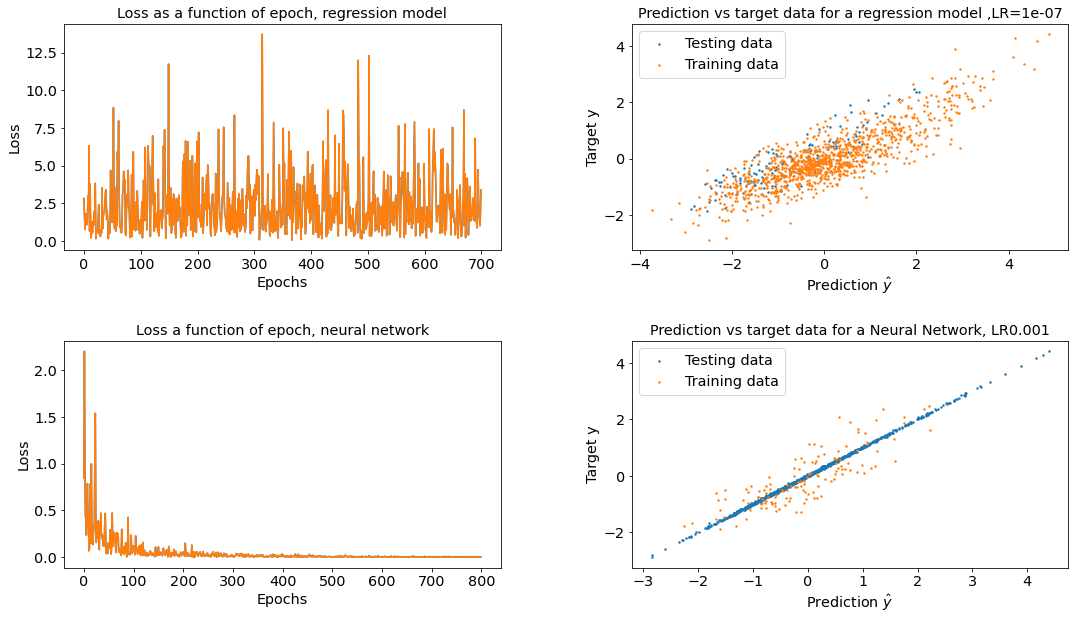

In [36]:
pred_neur_train_np=pred_neur_train.detach().numpy()

yt_train_np=yt_train.detach().numpy()

pred_neur_test_np=pred_neur_test.detach().numpy()

yt_test_np=yt_test.detach().numpy()

fig,ax=plt.subplots(2,2,figsize=(18,10))
iter_plot=np.arange(0,epochs,1)
iter_plot_aff=np.arange(0,epochsaff,1)

fig.subplots_adjust(hspace=0.4,wspace=0.3)

xvarlist=[iter_plot_aff,[predaffine_test_np,predaffine_train_np],iter_plot,[pred_neur_train_np,pred_neur_test_np]]
yvarlist=[loss_list_aff_np,[yt_test1_np,yt_train1_np],loss_neur,[yt_train_np,yt_test_np]]

xlabels=['Epochs','Prediction $\hat{y}$',"Epochs",'Prediction $\hat{y}$']
ylabels=['Loss','Target y','Loss','Target y']

plotlabels=['Testing data','Training data']
plot_titles=['Loss as a function of epoch, regression model',"Prediction vs target data for a regression model ,LR="+str(LRaff),"Loss a function of epoch, neural network","Prediction vs target data for a Neural Network, LR" + str (LR)]

ax=ax.ravel()

for i in range(len(xvarlist)):
    for j in range(2):
        if i==1:
            ax[i].scatter(xvarlist[i][j],yvarlist[i][j],label=plotlabels[j],s=2)
            ax[i].set_title(plot_titles[i])
            ax[i].legend()
        if i==3:
            ax[i].scatter(xvarlist[i][j],yvarlist[i][j],label=plotlabels[j],s=2)
            ax[i].set_title(plot_titles[i])
            ax[i].legend()
        if i==2:
            ax[i].plot(xvarlist[i],yvarlist[i])
            ax[i].set_title(plot_titles[i])
        if i==0:
             ax[i].plot(xvarlist[i],yvarlist[i])
        ax[i].set_xlabel(xlabels[i])
        ax[i].set_ylabel(ylabels[i])
        ax[i].set_title(plot_titles[i])

I am getting a much better fit with the Neural network than with linear regression, the magnitudes of the loss for the neural network are lower and the loss converges, whereas linear regression does not show a convergence. 
I initialized the free parameters using numpy rand,how you initialize does not seem to make much of a difference now.

Now plot the target ENSO 3.4 index values $y$ against the predictions from the linear regression and the neural network. Clearly mark the boundary between training and testing data.

What are mean square errors for the NN and linear regression, in original data units, on the testing and training data? How about Pearson's correlation coefficient?

In [81]:
'''loss_list_aff
loss_neur'''

corr_aff_train=np.corrcoef(predaffine_train_np,yt_train_np)
print('Test data correlation, linear regression:'+str(corr_aff_train))
corr_aff_test=np.corrcoef(pred_neur_test_np,yt_test_np)
print('Training data correlation, linear regression:'+str(corr_aff_test))

corr_nn_test=np.corrcoef(pred_neur_test_np, yt_test_np)
print('Test data correlation, neural network:'+str(corr_nn_test))
corr_nn_train=np.corrcoef(pred_neur_train_np, yt_train_np)
print('Training data correlation, neural network:'+str(corr_nn_train))



Test data correlation, linear regression:[[1.         0.85476492]
 [0.85476492 1.        ]]
Training data correlation, linear regression:[[1.         0.83387188]
 [0.83387188 1.        ]]
Test data correlation, neural network:[[1.         0.83387188]
 [0.83387188 1.        ]]
Training data correlation, neural network:[[1.         0.99975183]
 [0.99975183 1.        ]]


The correlation of a data sample with itself is 1 as expected, the training data of the neural network shows the best correlation with the target data at a value of 0.99,i.e. nearly perfect correlation. The linear regression comes in at 0.83,0.85 for training and test data,respectively. This poorer correlation value as compared to the NN is shown by the scatter plot of prediction and target data. 

Now we'll do the same thing, but defining a python object class for our neural network, and some built-in PyTorch classes:

In [37]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, n_inputs=46, n_outputs=1, n_hidden=32):
        super(Net, self).__init__()
                

        self.fc1 = nn.Linear(n_inputs, n_hidden)  # 5*5 from image dimension
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.fc3 = nn.Linear(n_hidden, n_outputs)
     
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

As described in the first two lectures, we are now building our neural net out of composable functions that we can stack together like legos.

PyTorch also lets us iterate in loops over the trainable parameters of the model. Note how `requires_grad` was correctly set by default for the learnable parameters.

In [38]:
net = Net()
for name, param in net.named_parameters():
    print(f'{name}: requires_grad={param.requires_grad}')

fc1.weight: requires_grad=True
fc1.bias: requires_grad=True
fc2.weight: requires_grad=True
fc2.bias: requires_grad=True
fc3.weight: requires_grad=True
fc3.bias: requires_grad=True


When we use our network object like a function, the input gets passed to the `forward()` method:

In [39]:
print(net(torch.rand(46)))

tensor([0.0742], grad_fn=<AddBackward0>)


We can also provide it with multiple inputs to process independently:

In [40]:
print(net(torch.rand(4,46)))

tensor([[0.0522],
        [0.0494],
        [0.0062],
        [0.0614]], grad_fn=<AddmmBackward0>)


Now redo the training loop from before, but now update the parameters using an inner loop over `net.named_parameters` (remember to use `torch.no_grad()` when updating parameters, and to zero out the derivatives after you do so).

Instead of calling `var.grad.zero()` on each trainable variable, we can now also simply call `net.zero_grad()` once.

Look up the default initialization of weights and biases in the `nn.Linear` objects you used.

In [41]:
LR_fast=1.0e-3
epochs_fast=1000
loss_nn=[]
for k in range(epochs_fast):
    for j,(x_batch, y_batch) in enumerate(data_loader):
        yhat=net(x_batch)
        #print(yhat.size())
        loss = torch.sum((yhat-y_batch.reshape(-1,1))**2)
        loss.backward()
    with torch.no_grad():
        for name, param in net.named_parameters():
                param-=param.grad*LR_fast
                net.zero_grad()
    loss_nn.append(loss.detach().numpy())

In [42]:
ypredfasttrain=net(xt_train).detach().numpy()
ypredfasttest=net(xt_test).detach().numpy()

In [43]:
'''plt.scatter(ypredfast,yt_train)'''

'plt.scatter(ypredfast,yt_train)'

Text(0.5, 1.0, 'Target vs prediction,NN object,LR=0.001')

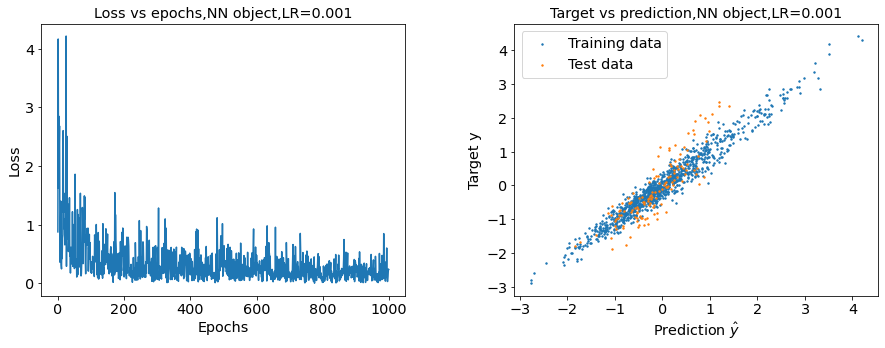

In [44]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.ravel()
iter_plot_fast=np.arange(0,epochs_fast,1)
fig.subplots_adjust(hspace=0.4,wspace=0.3)

ax[0].plot(iter_plot_fast,loss_nn)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title("Loss vs epochs,NN object,LR="+str(LR_fast) )
ax[1].scatter(ypredfasttrain,yt_train,label='Training data',s=2)
ax[1].scatter(ypredfasttest,yt_test,label='Test data',s=2)
ax[1].legend()
ax[1].set_xlabel('Prediction $\hat{y}$')
ax[1].set_ylabel('Target y')
ax[1].set_title("Target vs prediction,NN object,LR="+str(LR_fast))

Change the `Net()` class above to allow an adjustable number of hidden layers to be specified when initializing the object, and to specify a different number of hidden units for each hidden layer. Can you get better results on the testing data by adjusting this?

In [1]:
#### Change Net() to allow for any number of hidden layers ######
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, n_inputs=46, n_outputs=1, n_hidden=32,nlayers=20):
        super(Net, self).__init__()
        layers=[] 
        for i in range(nlayers):
            if i==0:
                layers.append(nn.Linear(n_inputs,n_hidden))
            else:
                layers.append(nn.Linear(n_hidden,n_hidden))
            
        layers.append(nn.Linear(n_hidden,n_outputs))
                
        self.layers=nn.Modulelist(layers)
            

    ''' self.fc1 = nn.Linear(n_inputs, n_hidden)  # 5*5 from image dimension
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.fc3 = nn.Linear(n_hidden, n_outputs)'''
     
    def forward(self, x):
        for idx in range(nlayers-1):
            x = F.relu(self.layers[idx](x))
        x = self.layers[-1](x)
        return x

In [46]:
LR_fast=1.0e-3
epochs_fast=1000
loss_nn=[]
for k in range(epochs_fast):
    for j,(x_batch, y_batch) in enumerate(data_loader):
        yhat=net(x_batch)
        #print(yhat.size())
        loss = torch.sum((yhat-y_batch.reshape(-1,1))**2)
        loss.backward()
    with torch.no_grad():
        for name, param in net.named_parameters():
                param-=param.grad*LR_fast
                net.zero_grad()
    loss_nn.append(loss.detach().numpy())
ypredfasttrain=net(xt_train).detach().numpy()
ypredfasttest=net(xt_test).detach().numpy()

Text(0.5, 1.0, 'Target vs prediction,NN object,LR=0.001')

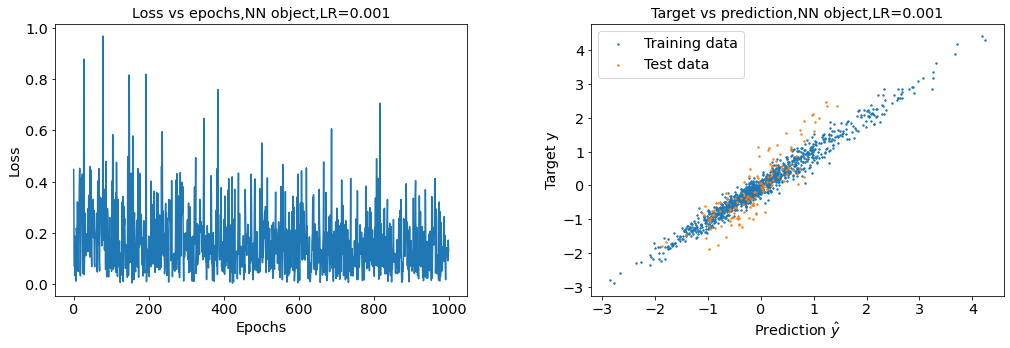

In [47]:
fig,ax=plt.subplots(1,2,figsize=(17,5))
ax=ax.ravel()
iter_plot_fast=np.arange(0,epochs_fast,1)
fig.subplots_adjust(hspace=0.4,wspace=0.3)

ax[0].plot(iter_plot_fast,loss_nn)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title("Loss vs epochs,NN object,LR="+str(LR_fast) )
ax[1].scatter(ypredfasttrain,yt_train,label='Training data',s=2)
ax[1].scatter(ypredfasttest,yt_test,label='Test data',s=2)
ax[1].legend()
ax[1].set_xlabel('Prediction $\hat{y}$')
ax[1].set_ylabel('Target y')
ax[1].set_title("Target vs prediction,NN object,LR="+str(LR_fast))